# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# 1) Load file

In [6]:
filepath = Path("..", "data", "yellow_tripdata_2022-01.parquet")
df = pd.read_parquet(filepath)

# 2) Exploring the data

Since we want to create a model that predicts the travelling time between two locations, we should analyze which variables that could be present on the time of inference. For a first model, I think of the following features:

- trip_distance -> We could know the approximate trip distance in advance because we know the pickup location and the dropoff location
- passenger_count 
- PULocationID
- DOLocationID
- Day of the week -> Depending on the day of the week the traffic is different
- Is it a holiday? -> Usually on holidays the traffic is different than common weekdays
- Time of the day -> Depending on the time we have different traffic patterns

First we can check the main statistics and datatypes of the dataframe:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [8]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
std,5.021375e-01,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00


Let's check NaN values

In [28]:
df.isna().sum() / len(df)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.02902
trip_distance            0.00000
RatecodeID               0.02902
store_and_fwd_flag       0.02902
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.02902
airport_fee              0.02902
dtype: float64

Since the `passenger_count` have nans (2%), we could drop from our features if it is needed. However since we have 2463931 entries, ~3% is not a significant amount of values to drop.

## 2.1) Analyzing PULocationID and DOLocationID

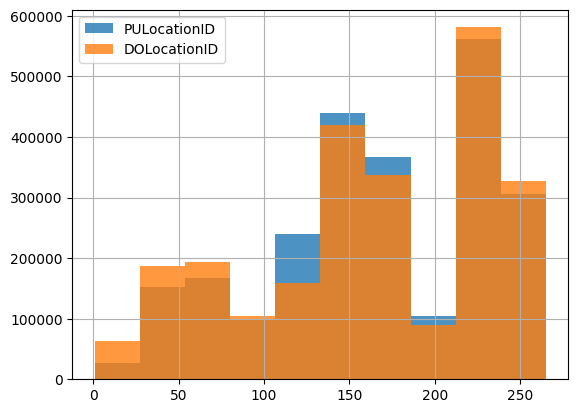

In [21]:
df["PULocationID"].hist(alpha=0.8, legend=True);
df["DOLocationID"].hist(alpha=0.8, legend=True);

We see that the distrubution for the pick up location (`PULocationID`), and the drop off location (`DOLocationID`) is very similar. This indicates that the data is not completely imbalanced, making it easier to feed the data for a ML model.

In [22]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

## 2.2) Analyziung the trip_distance

In [24]:
df["trip_distance"].describe()

count    2.463931e+06
mean     5.372751e+00
std      5.478714e+02
min      0.000000e+00
25%      1.040000e+00
50%      1.740000e+00
75%      3.130000e+00
max      3.061593e+05
Name: trip_distance, dtype: float64

In [30]:
mask = df["trip_distance"] == df["trip_distance"].max()
df[mask]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2409416,2,2022-01-11 11:48:00,2022-01-11 12:00:00,NaN,306159.28,NaN,None,116,238,0,14.96,0.0,0.5,3.94,0.0,0.3,22.2,NaN,NaN


This seems to be a wrong input on the trip_distance. We can see if it is a missing input by analyzing the taxi trips that had the same Pick Up location and Drop Off location.

In [36]:
mask_pu, mask_do = df["PULocationID"] == 116, df["DOLocationID"] == 238
df[mask_pu & mask_do]["trip_distance"].describe()

count        94.000000
mean       3259.932766
std       31577.614294
min           2.100000
25%           2.600000
50%           2.900000
75%           3.245000
max      306159.280000
Name: trip_distance, dtype: float64